In [1]:
import sys
import os
import polars as pl
import pandas as pd
import itables

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, "../../", 'src'))

from config import Constants
from preprocessing.preprocessing import BigDataBowlData
from preprocessing.play_prediction import PlayPredictionModel
from plotting.plotting import PlotPlayVertical
import seaborn as sns

# init_notebook_mode(all_interactive=True)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(100)


GAMES_FILE = "../../data/games.csv"
PLAYS_FILE = "../../data/plays.csv"
PLAYERS_FILE = "../../data/players.csv"
PLAYER_PLAYS_FILE = "../../data/player_play.csv"

TRACKING_FILES = ["../../data/tracking_week_1.csv",
                  "../../data/tracking_week_2.csv",
                    "../../data/tracking_week_3.csv",
                    "../../data/tracking_week_4.csv",
                    "../../data/tracking_week_5.csv",
                    "../../data/tracking_week_6.csv",
                    "../../data/tracking_week_7.csv",
                    "../../data/tracking_week_8.csv",
                    "../../data/tracking_week_9.csv",
                  ]

data = BigDataBowlData(GAMES_FILE, 
                       PLAYS_FILE, 
                       PLAYERS_FILE, 
                       PLAYER_PLAYS_FILE, 
                       TRACKING_FILES)


In [6]:
play1_tracking = data.tracking_data.filter((pl.col("gameId") == 2022102310) & (pl.col("playId") == 3537)).collect()
play1_tracking.filter((pl.col("event") != "NA") & (pl.col("club") == "football")).select(["frameId", "event"]).sort("frameId")

frameId,event
i64,str
8,"""line_set"""
57,"""ball_snap"""
69,"""handoff"""
88,"""first_contact"""
99,"""tackle"""


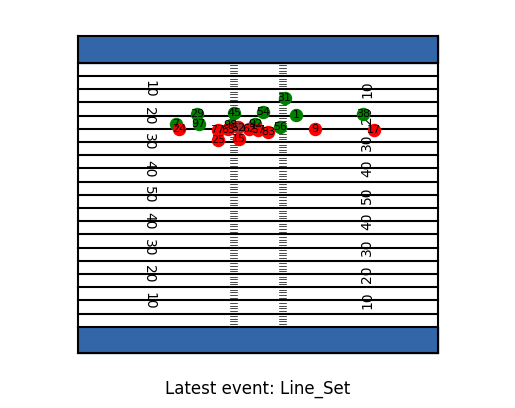

In [10]:
play1_plot = PlotPlayVertical(play1_tracking)

# Line set
play1_plot.plot_frame(8)

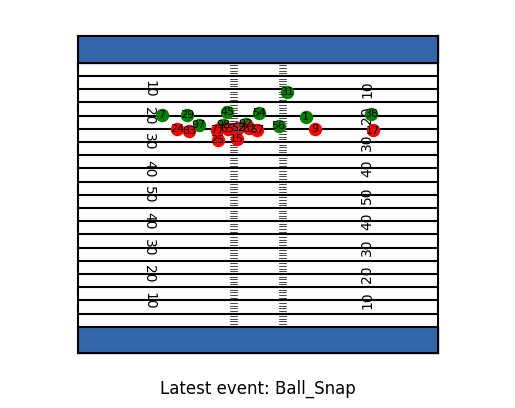

In [11]:
# Ball snap
play1_plot.plot_frame(57)

In [12]:
play2_tracking = data.tracking_data.filter((pl.col("gameId") == 2022103001) & (pl.col("playId") == 2623)).collect()
play2_tracking.filter((pl.col("event") != "NA") & (pl.col("club") == "football")).select(["frameId", "event"]).sort("frameId")

frameId,event
i64,str
1,"""huddle_break_offense"""
46,"""line_set"""
197,"""man_in_motion"""
204,"""ball_snap"""
216,"""play_action"""
232,"""pass_forward"""
237,"""pass_arrived"""
238,"""pass_outcome_caught"""
283,"""touchdown"""


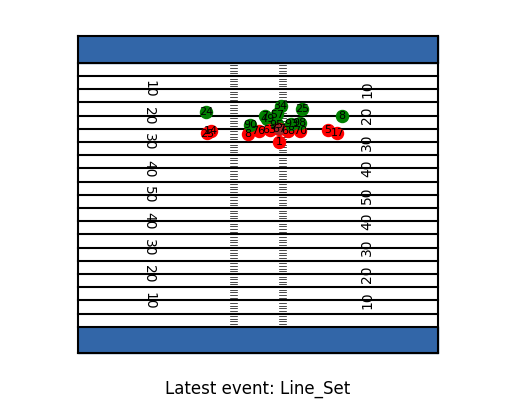

In [13]:
play2_plot = PlotPlayVertical(play2_tracking)

# Line set
play2_plot.plot_frame(46)

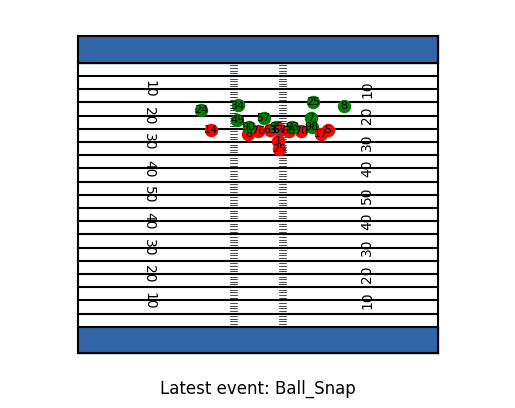

In [14]:
play2_plot.plot_frame(204)